In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

In [2]:
# Loading Data
df = pd.read_csv(r"C:\Users\Arung\OneDrive\Desktop\PROJECT\DATASET\Credit_Card_Default.csv")

In [3]:
# Priting first three rows
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.tail(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [5]:
df.shape

(30000, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
# Fetching all column name
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [8]:
# RenamingVariable for understaning
df.rename(columns = {'ID':'id', 'LIMIT_BAL':'limit_bal', 'SEX':'gender', 'EDUCATION':'education', 'MARRIAGE':'marriage', 'AGE':'age','PAY_0': 'repay_sept',
       'PAY_2':'repay_aug', 'PAY_3':'repay_july', 'PAY_4': 'repay_june', 'PAY_5':'repay_may', 'PAY_6':'repay_april', 'BILL_AMT1':'bill_sept', 'BILL_AMT2':'bill_aug',
       'BILL_AMT3':'bill_july', 'BILL_AMT4':'bill_june', 'BILL_AMT5':'bill_may', 'BILL_AMT6':'bill_april', 'PAY_AMT1': 'pay_amt_sept',
       'PAY_AMT2':'pay_amt_aug', 'PAY_AMT3':'pay_amt_july', 'PAY_AMT4':'pay_amt_june', 'PAY_AMT5':'pay_amt_may', 'PAY_AMT6':'pay_amt_april',
       'default.payment.next.month':'defaulter'}, inplace = True)

In [9]:
df.head(1)

,id,limit_bal,gender,education,marriage,age,repay_sept,repay_aug,repay_july,repay_june,...,bill_june,bill_may,bill_april,pay_amt_sept,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,defaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1


In [10]:
# Null-Values

df.isnull().sum()

id               0
limit_bal        0
gender           0
education        0
marriage         0
age              0
repay_sept       0
repay_aug        0
repay_july       0
repay_june       0
repay_may        0
repay_april      0
bill_sept        0
bill_aug         0
bill_july        0
bill_june        0
bill_may         0
bill_april       0
pay_amt_sept     0
pay_amt_aug      0
pay_amt_july     0
pay_amt_june     0
pay_amt_may      0
pay_amt_april    0
defaulter        0
dtype: int64

In [11]:
# Duplicate 

df.duplicated().sum()

0

In [12]:
# Statical Analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
gender,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
education,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
marriage,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
repay_sept,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
repay_aug,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
repay_july,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
repay_june,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


## EDA

In [14]:
# defaulter distribution

df["defaulter"].value_counts()

defaulter
0    23364
1     6636
Name: count, dtype: int64

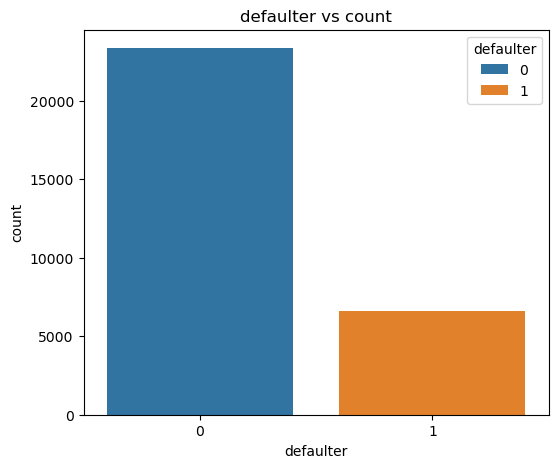

In [15]:
plt.figure(figsize = (6,5))
sns.countplot(x="defaulter", data = df, hue = 'defaulter')
plt.title("defaulter vs count")
plt.show()

## here we have imbalance dataset.

In [17]:
# Gender wise Distribution

df['gender'].value_counts()

gender
2    18112
1    11888
Name: count, dtype: int64

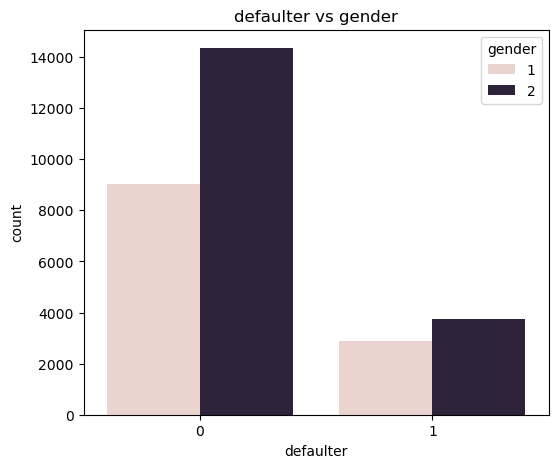

In [18]:
plt.figure(figsize = (6,5))
sns.countplot(x="defaulter", data = df, hue = 'gender')
plt.title("defaulter vs gender")
plt.show()

In [19]:
# Education

df['education'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [20]:
# EducationWise Distribution

df['education'].value_counts()

education
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [21]:
# combining 0,5,6 with 4

df.loc[df['education'].isin([5, 6, 0]), 'education'] = 4

In [22]:
df['education'].unique()

array([2, 1, 3, 4], dtype=int64)

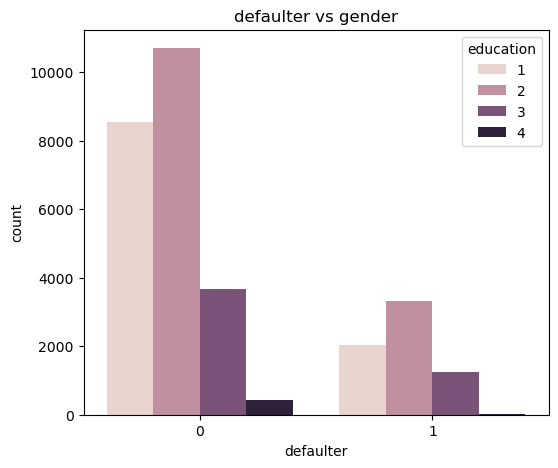

In [23]:
plt.figure(figsize = (6,5))
sns.countplot(x="defaulter", data = df, hue = 'education')
plt.title("defaulter vs gender")
plt.show()

In [24]:
# Marriage


df['marriage'].unique()

array([1, 2, 3, 0], dtype=int64)

In [25]:
# combining 0 & 3

df.loc[df['marriage'].isin([0,3]), 'marriage'] = 3

In [26]:
df['marriage'].unique()

array([1, 2, 3], dtype=int64)

In [27]:
df["marriage"].value_counts()

marriage
2    15964
1    13659
3      377
Name: count, dtype: int64

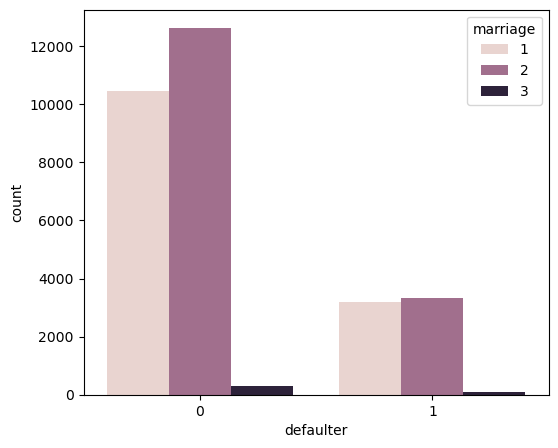

In [28]:
plt.figure(figsize = (6,5))
sns.countplot(x= 'defaulter', data=df, hue = 'marriage')
plt.show()

## Limit

In [30]:
# Max limit
df['limit_bal'].max()

1000000.0

In [31]:
# Min limit
df['limit_bal'].min()

10000.0

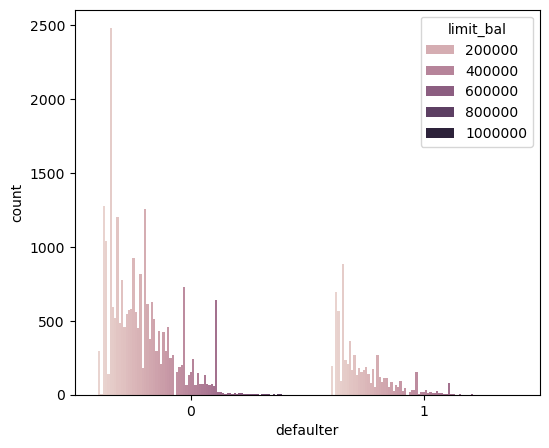

In [32]:
plt.figure(figsize = (6,5))
sns.countplot(x= 'defaulter', data=df, hue = 'limit_bal')
plt.show()

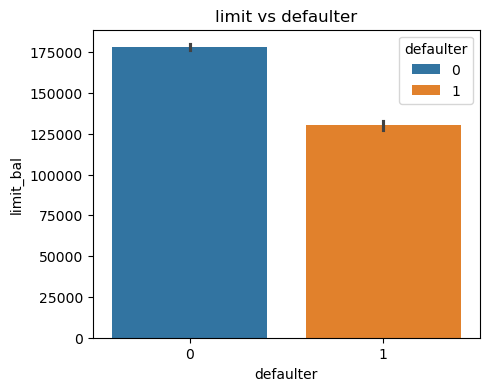

In [33]:
plt.figure(figsize = (5,4))
sns.barplot(x= 'defaulter', y = 'limit_bal', data = df, hue = 'defaulter')
plt.title('limit vs defaulter')
plt.show()

In [34]:
df.columns

Index(['id', 'limit_bal', 'gender', 'education', 'marriage', 'age',
       'repay_sept', 'repay_aug', 'repay_july', 'repay_june', 'repay_may',
       'repay_april', 'bill_sept', 'bill_aug', 'bill_july', 'bill_june',
       'bill_may', 'bill_april', 'pay_amt_sept', 'pay_amt_aug', 'pay_amt_july',
       'pay_amt_june', 'pay_amt_may', 'pay_amt_april', 'defaulter'],
      dtype='object')

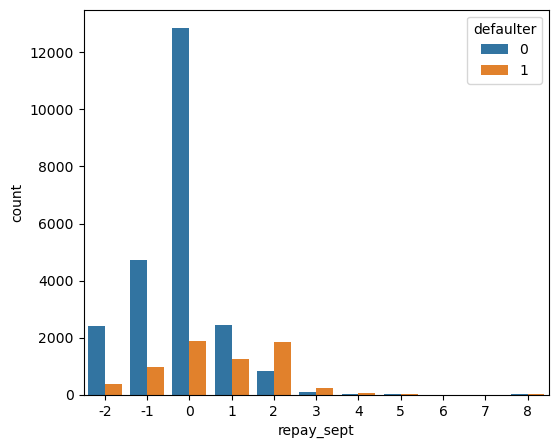

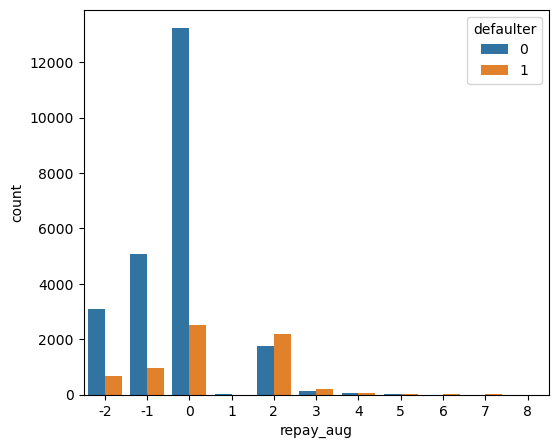

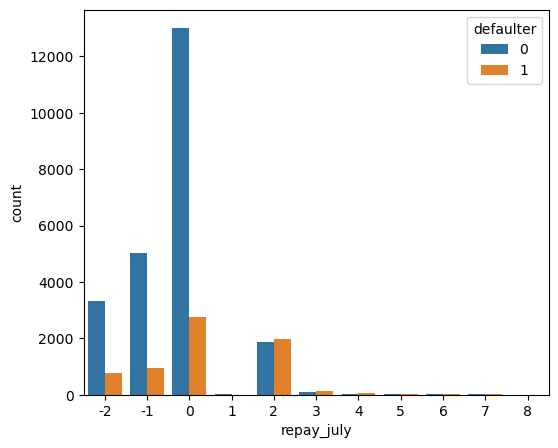

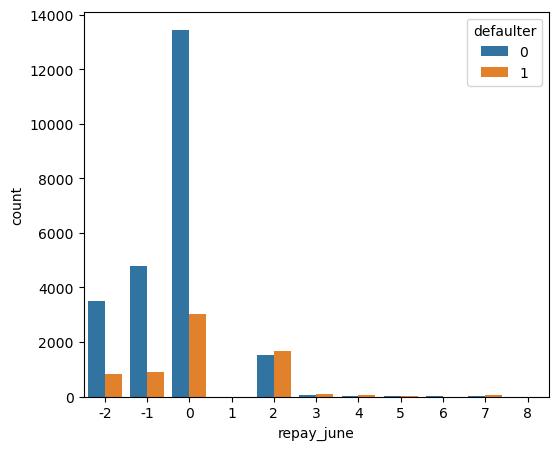

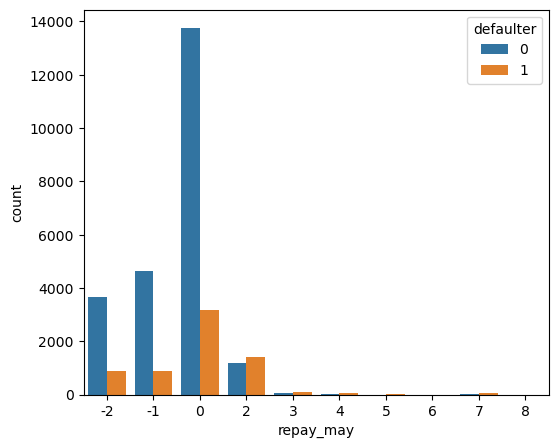

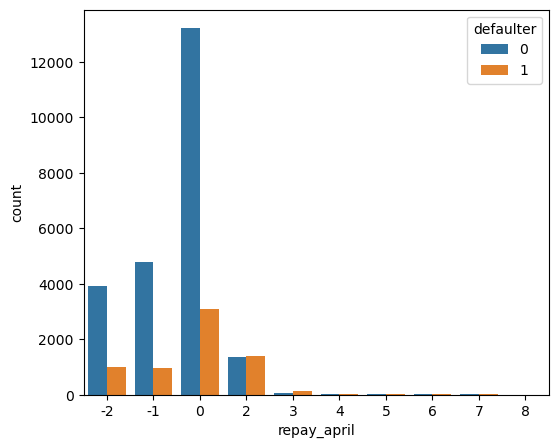

In [35]:
# Visualizing Payment 

payment_column = ['repay_sept','repay_aug', 'repay_july', 'repay_june', 'repay_may', 'repay_april']
for col in payment_column:
  plt.figure(figsize=(6,5))
  sns.countplot(x = col, hue = 'defaulter', data = df)

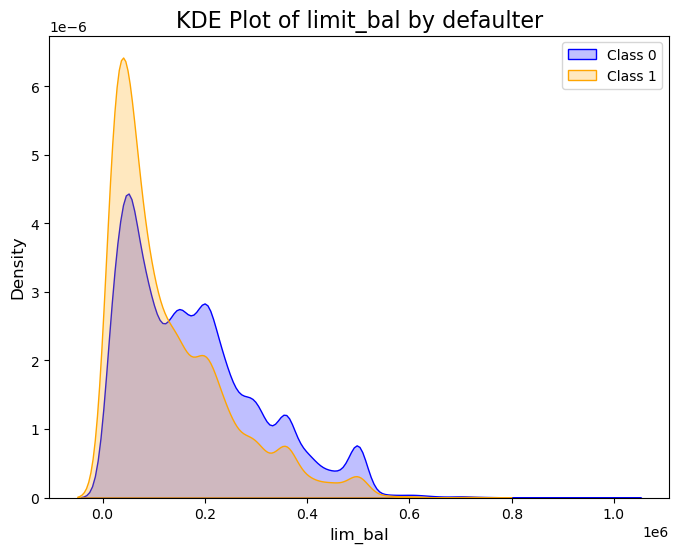

In [36]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['defaulter'] == 0]['limit_bal'], label='Class 0', shade=True, color='blue')
sns.kdeplot(data=df[df['defaulter'] == 1]['limit_bal'], label='Class 1', shade=True, color='orange')

# Add Labels and Title
plt.title('KDE Plot of limit_bal by defaulter', fontsize=16)
plt.xlabel('lim_bal', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

## Treating Imbalacing

In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['defaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [39]:
x_smote.head(2)

,id,limit_bal,gender,education,marriage,age,repay_sept,repay_aug,repay_july,repay_june,...,bill_july,bill_june,bill_may,bill_april,pay_amt_sept,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0


In [40]:
y_smote

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: defaulter, Length: 46728, dtype: int64

In [41]:
# Creating New Dataframe

In [42]:
col = list(df.columns)

In [43]:
col

['id',
 'limit_bal',
 'gender',
 'education',
 'marriage',
 'age',
 'repay_sept',
 'repay_aug',
 'repay_july',
 'repay_june',
 'repay_may',
 'repay_april',
 'bill_sept',
 'bill_aug',
 'bill_july',
 'bill_june',
 'bill_may',
 'bill_april',
 'pay_amt_sept',
 'pay_amt_aug',
 'pay_amt_july',
 'pay_amt_june',
 'pay_amt_may',
 'pay_amt_april',
 'defaulter']

In [44]:
col.pop()

'defaulter'

In [45]:
df1 = pd.DataFrame(x_smote,columns = col)

In [46]:
df1['defaulter'] = y_smote

<Axes: xlabel='defaulter', ylabel='count'>

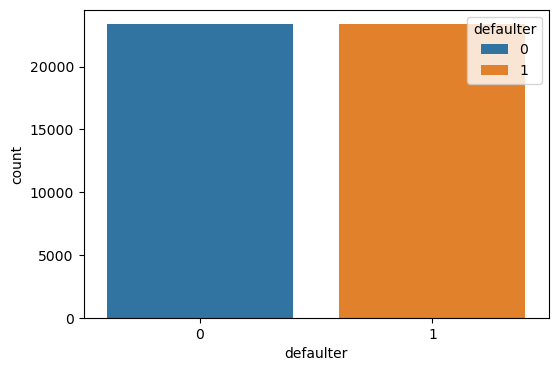

In [47]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'defaulter', data = df1, hue = 'defaulter')

In [48]:
df1

,id,limit_bal,gender,education,marriage,age,repay_sept,repay_aug,repay_july,repay_june,...,bill_june,bill_may,bill_april,pay_amt_sept,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,defaulter
0,1,20000.000000,2,2,1,24,2,2,-1,-1,...,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,2,120000.000000,2,2,2,26,-1,2,0,0,...,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
2,3,90000.000000,2,2,2,34,0,0,0,0,...,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
3,4,50000.000000,2,2,1,37,0,0,0,0,...,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
4,5,50000.000000,1,2,1,57,-1,0,-1,0,...,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,18511,500000.000000,1,1,1,49,0,-1,0,0,...,6317.066687,8373.923917,17624.674382,23441.870460,24759.646746,6220.134534,3338.200761,11788.347099,97021.028557,1
46724,21503,50000.000000,2,2,1,42,1,2,2,0,...,21287.897167,21280.840982,22222.374659,604.620887,0.000000,1767.188412,459.031025,1283.099790,596.919409,1
46725,8285,176995.883139,1,1,1,38,0,0,0,0,...,30497.115153,31204.004077,32061.987610,1668.395139,1602.633838,1209.913586,1200.576202,1378.271633,1093.333545,1
46726,19201,51888.149730,1,2,2,30,0,0,0,0,...,43543.742846,6010.989974,39969.155106,2538.710349,1882.726836,2399.820161,244.212560,38836.265268,2000.000000,1


In [49]:
# Droping 'id' column
df1.drop('id', axis= 1, inplace = True)

In [50]:
df1.replace({'gender': {1 : 'male', 2 : 'female'}, 'education' : {1 : 'graduate', 2 : 'university', 3 : 'highschool', 4 : 'others'}, 'marriage' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [51]:
df1.head(2)

,limit_bal,gender,education,marriage,age,repay_sept,repay_aug,repay_july,repay_june,repay_may,...,bill_june,bill_may,bill_april,pay_amt_sept,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,defaulter
0,20000.0,female,university,married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,female,university,single,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [52]:
df1.dtypes

limit_bal        float64
gender            object
education         object
marriage          object
age                int64
repay_sept         int64
repay_aug          int64
repay_july         int64
repay_june         int64
repay_may          int64
repay_april        int64
bill_sept        float64
bill_aug         float64
bill_july        float64
bill_june        float64
bill_may         float64
bill_april       float64
pay_amt_sept     float64
pay_amt_aug      float64
pay_amt_july     float64
pay_amt_june     float64
pay_amt_may      float64
pay_amt_april    float64
defaulter          int64
dtype: object

In [53]:
columns_to_encode = ['gender', 'education', 'marriage','repay_sept', 'repay_aug', 'repay_july',
       'repay_june', 'repay_may', 'repay_april']

In [54]:
dummies =pd.get_dummies(df1, columns=columns_to_encode, drop_first=True)

In [55]:
df2 = dummies.astype(int)

In [56]:
df2['payement_total'] = df2['pay_amt_sept'] + df2['pay_amt_aug'] + df2['pay_amt_july'] + df2['pay_amt_june'] + df2['pay_amt_may'] + df2['pay_amt_april']

In [57]:
df2['total_bill']=df2['bill_sept']+df2['bill_aug']+df2['bill_july']+df2['bill_june']+df2['bill_may']+ df2['bill_april']

In [58]:
df2['Dues'] = df2['total_bill']-df2['payement_total']

In [59]:
df2.head(3)

,limit_bal,age,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,pay_amt_sept,pay_amt_aug,...,repay_april_2,repay_april_3,repay_april_4,repay_april_5,repay_april_6,repay_april_7,repay_april_8,payement_total,total_bill,Dues
0,20000,24,3913,3102,689,0,0,0,0,689,...,0,0,0,0,0,0,0,689,7704,7015
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,1,0,0,0,0,0,0,5000,17077,12077
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,0,0,0,0,0,11018,101653,90635


In [60]:
# applying algorthm

In [61]:
X1= df2.drop(['defaulter','payement_total','Dues'],axis=1)
y = df2['defaulter']

In [62]:
X1.columns

Index(['limit_bal', 'age', 'bill_sept', 'bill_aug', 'bill_july', 'bill_june',
       'bill_may', 'bill_april', 'pay_amt_sept', 'pay_amt_aug', 'pay_amt_july',
       'pay_amt_june', 'pay_amt_may', 'pay_amt_april', 'gender_male',
       'education_highschool', 'education_others', 'education_university',
       'marriage_others', 'marriage_single', 'repay_sept_-1', 'repay_sept_0',
       'repay_sept_1', 'repay_sept_2', 'repay_sept_3', 'repay_sept_4',
       'repay_sept_5', 'repay_sept_6', 'repay_sept_7', 'repay_sept_8',
       'repay_aug_-1', 'repay_aug_0', 'repay_aug_1', 'repay_aug_2',
       'repay_aug_3', 'repay_aug_4', 'repay_aug_5', 'repay_aug_6',
       'repay_aug_7', 'repay_aug_8', 'repay_july_-1', 'repay_july_0',
       'repay_july_1', 'repay_july_2', 'repay_july_3', 'repay_july_4',
       'repay_july_5', 'repay_july_6', 'repay_july_7', 'repay_july_8',
       'repay_june_-1', 'repay_june_0', 'repay_june_1', 'repay_june_2',
       'repay_june_3', 'repay_june_4', 'repay_june_5', 're

In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X1)

In [64]:
X

array([[-1.06488447e+00, -1.29620769e+00, -6.28860590e-01, ...,
        -4.31892537e-02, -6.54237894e-03, -6.76201905e-01],
       [-2.70771463e-01, -1.06954354e+00, -6.45593019e-01, ...,
        -4.31892537e-02, -6.54237894e-03, -6.51759153e-01],
       [-5.09005366e-01, -1.62886963e-01, -2.84615667e-01, ...,
        -4.31892537e-02, -6.54237894e-03, -4.31203279e-01],
       ...,
       [ 1.81833248e-01,  2.90441327e-01, -3.05561787e-01, ...,
        -4.31892537e-02, -6.54237894e-03, -2.26593999e-01],
       [-8.11657717e-01, -6.16215252e-01,  6.51181119e-04, ...,
        -4.31892537e-02, -6.54237894e-03,  4.52543633e-02],
       [ 3.59071331e-01, -2.76219035e-01,  1.44382659e+00, ...,
        -4.31892537e-02, -6.54237894e-03,  1.96430118e+00]])

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [66]:
# Define parameter grid
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [67]:
grid_search =GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [68]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [69]:
optimized_clf = grid_search.best_estimator_

In [70]:
# Best parameters
grid_search.best_params_

{'C': 1000, 'penalty': 'l2'}

In [71]:
grid_search.best_score_

0.752164203267485

In [72]:
optimized_clf = grid_search.best_estimator_

In [73]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [74]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [75]:

# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7536014309898744
The accuracy on test data is  0.7520913040658842


In [76]:
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.7520913040658842
The precision on test data is  0.6872892347600519
The recall on test data is  0.7895991655490985
The f1 on test data is  0.7349004923375633
The roc_score on test data is  0.7563954495942966


[[12794  2859]
 [ 4855 10799]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

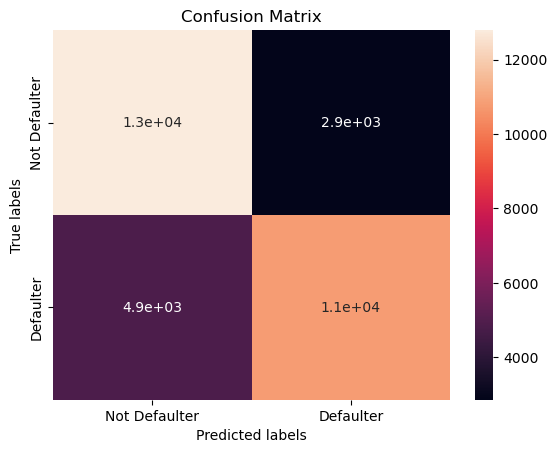

In [77]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [78]:
feature_importance = pd.DataFrame({'Features':X1.columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })

In [79]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

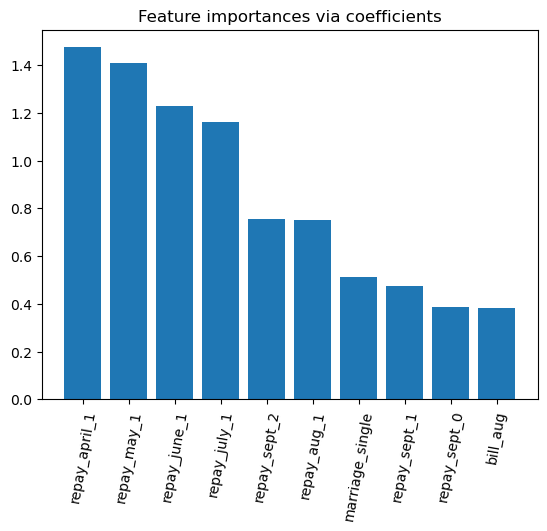

In [80]:
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [81]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
# define the model
model = SVC()

In [85]:
param_grid = {'C': [0.1, 1, 10, 100],   
              'kernel': ['rbf']}

In [86]:
# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..................................C=0.1, kernel=rbf; total time= 2.1min
[CV] END ..................................C=0.1, kernel=rbf; total time= 2.1min
[CV] END ..................................C=0.1, kernel=rbf; total time=13.8min
[CV] END ..................................C=0.1, kernel=rbf; total time= 2.3min
[CV] END ..................................C=0.1, kernel=rbf; total time= 2.4min
[CV] END ....................................C=1, kernel=rbf; total time= 2.1min
[CV] END ....................................C=1, kernel=rbf; total time= 1.9min
[CV] END ....................................C=1, kernel=rbf; total time= 1.9min
[CV] END ....................................C=1, kernel=rbf; total time= 1.9min
[CV] END ....................................C=1, kernel=rbf; total time= 1.9min
[CV] END ...................................C=10, kernel=rbf; total time= 2.7min
[CV] END ...................................C=10,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [87]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.7773259182627688


In [88]:
# Evaluate on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Accuracy:", test_score)

Test Accuracy: 0.7761609244596619


In [90]:
grid_search.best_score_

0.7773259182627688